In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
df = pd.read_csv("D:\\Data\\heart.csv")

In [3]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


In [4]:
df.columns.values

array(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg',
       'thalach', 'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype=object)

In [5]:
df.isna().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1025 non-null   int64  
 1   sex       1025 non-null   int64  
 2   cp        1025 non-null   int64  
 3   trestbps  1025 non-null   int64  
 4   chol      1025 non-null   int64  
 5   fbs       1025 non-null   int64  
 6   restecg   1025 non-null   int64  
 7   thalach   1025 non-null   int64  
 8   exang     1025 non-null   int64  
 9   oldpeak   1025 non-null   float64
 10  slope     1025 non-null   int64  
 11  ca        1025 non-null   int64  
 12  thal      1025 non-null   int64  
 13  target    1025 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 112.2 KB


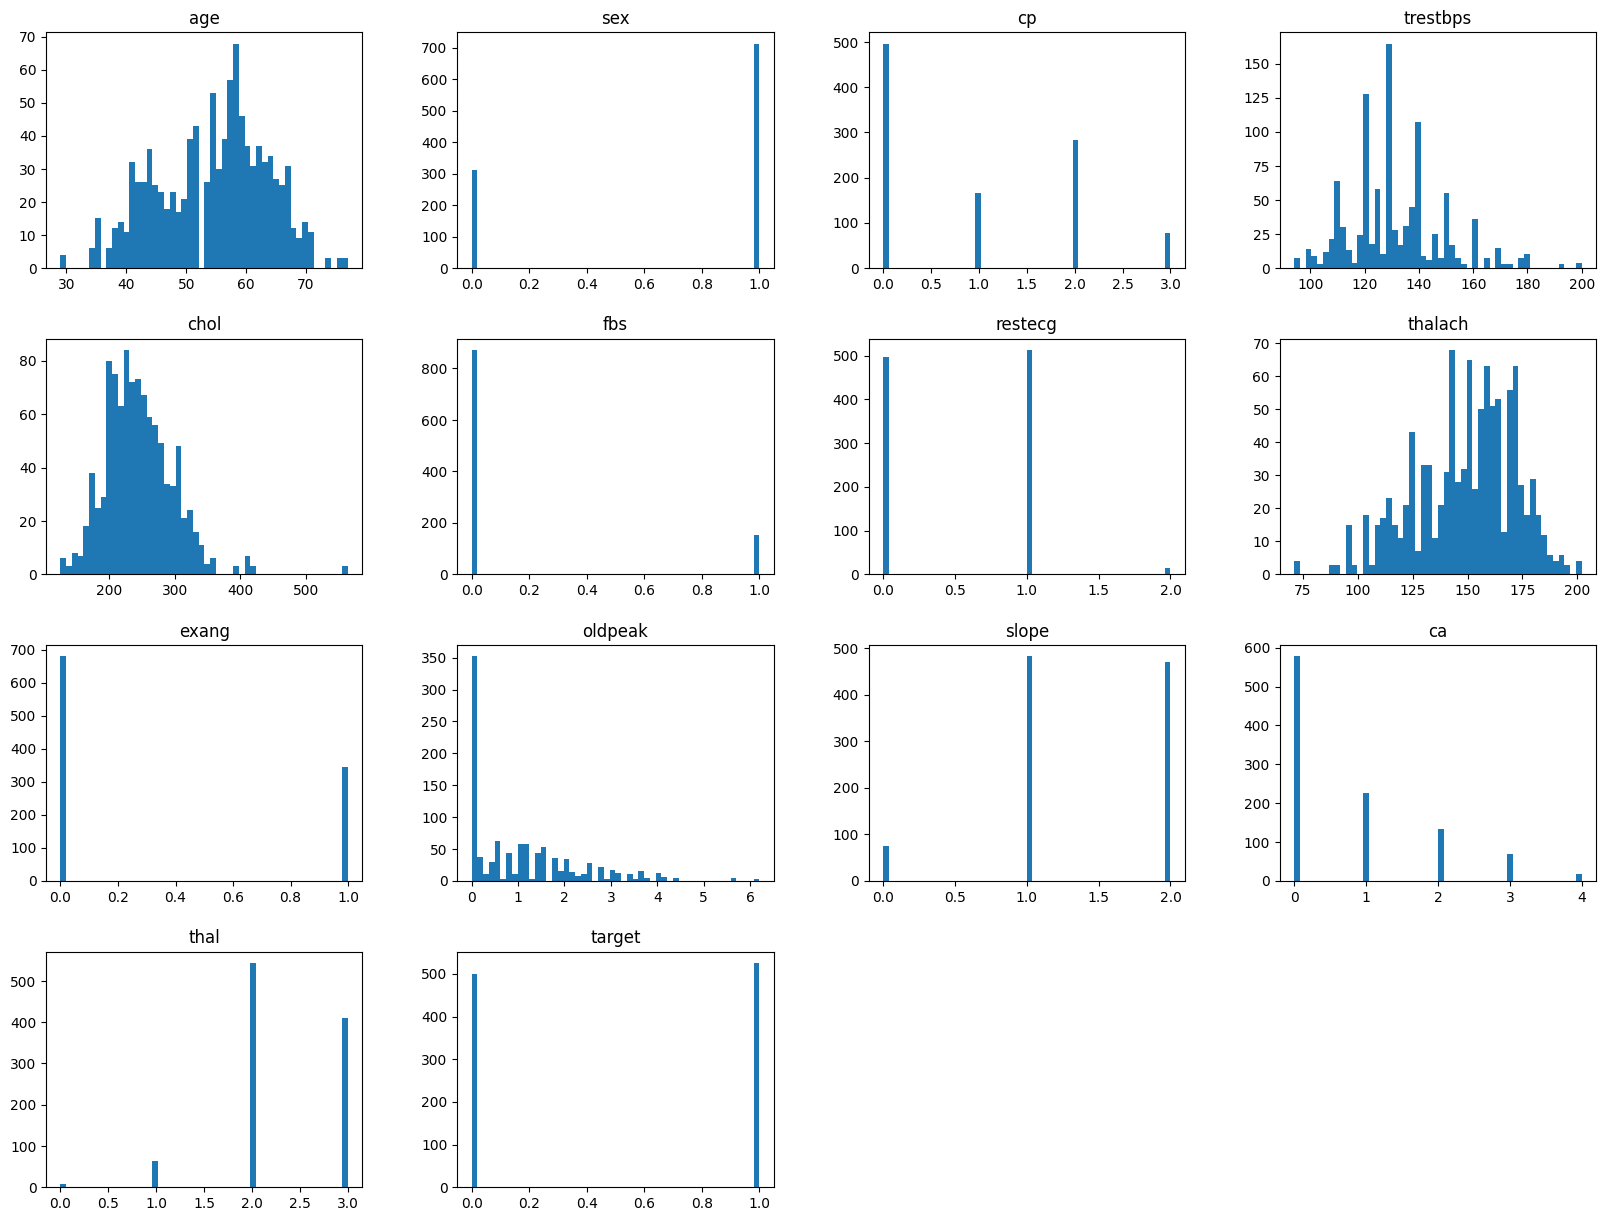

In [17]:
df.hist(bins = 50, grid = False, figsize = (20,15));

In [8]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,1025.000000,1025.000000,1025.000000,1025.000000,1025.00000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000
mean,54.434146,0.695610,0.942439,131.611707,246.00000,0.149268,0.529756,149.114146,0.336585,1.071512,1.385366,0.754146,2.323902,0.513171
std,9.072290,0.460373,1.029641,17.516718,51.59251,0.356527,0.527878,23.005724,0.472772,1.175053,0.617755,1.030798,0.620660,0.500070
min,29.000000,0.000000,0.000000,94.000000,126.00000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.000000,0.000000,0.000000,120.000000,211.00000,0.000000,0.000000,132.000000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,56.000000,1.000000,1.000000,130.000000,240.00000,0.000000,1.000000,152.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,275.00000,0.000000,1.000000,166.000000,1.000000,1.800000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.00000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


# Questions 

In [9]:
# 1. How many people have heart disease and how many people doesn't have heart disease ?
# 2. People of which sex have most heart disease ?
# 3. People of which sex have which type of chest pain the most ?
# 4. People with which chest pain are most prone to have heart disease ?

In [18]:
# 1. How many people have heart disease and how many people doesn't have heart disease ?

df.target.value_counts()

target
1    526
0    499
Name: count, dtype: int64

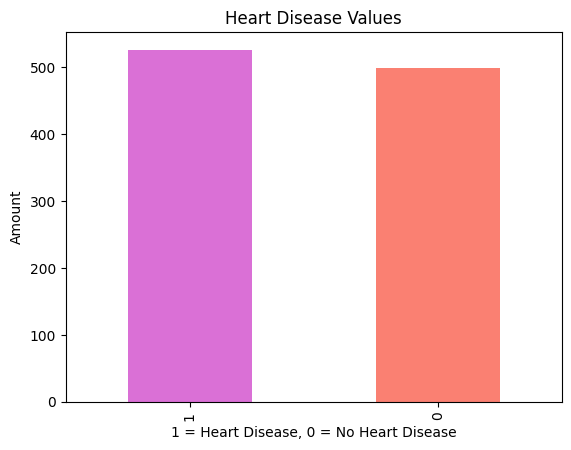

In [19]:
df.target.value_counts().plot(kind = 'bar', color =['orchid','salmon'])
plt.title("Heart Disease Values")
plt.xlabel("1 = Heart Disease, 0 = No Heart Disease")
plt.ylabel("Amount");

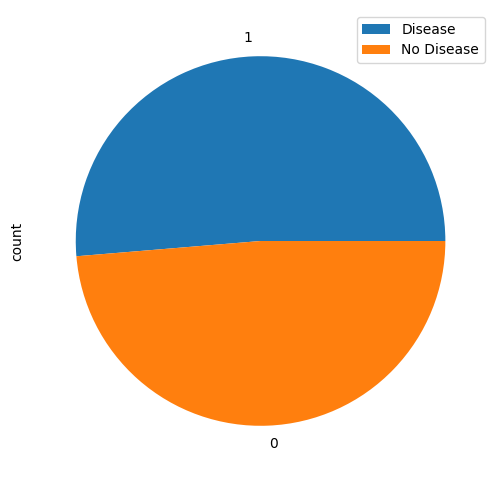

In [20]:
df.target.value_counts().plot(kind = 'pie', figsize = (8,6))
plt.legend(["Disease", "No Disease"])

In [21]:
# 2. People of which sex have most heart disease ? 


df.sex.value_counts()

sex
1    713
0    312
Name: count, dtype: int64

Text(0.5, 1.0, 'Male Female Ratio')

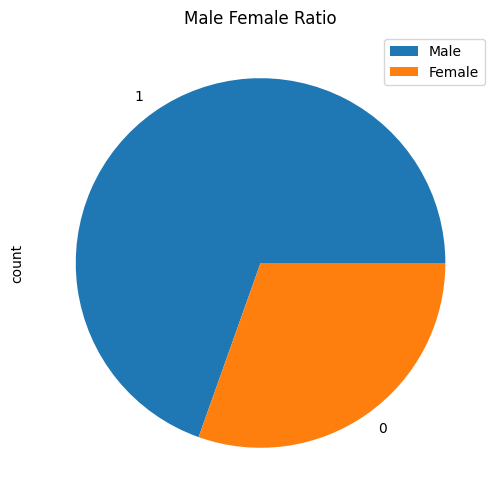

In [22]:
df.sex.value_counts().plot(kind = 'pie', figsize = (8,6))
plt.legend(["Male", "Female"])
plt.title("Male Female Ratio")

In [23]:
pd.crosstab(df.target, df.sex)

sex,0,1
target,,
0,86,413
1,226,300


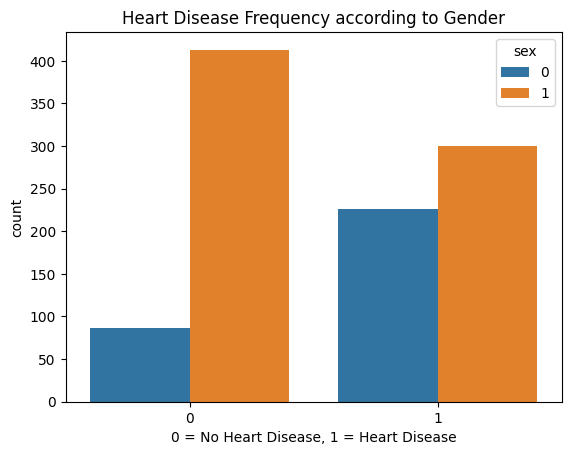

In [9]:
sns.countplot(x= 'target', data = df, hue = 'sex')
plt.title("Heart Disease Frequency according to Gender")
plt.xlabel("0 = No Heart Disease, 1 = Heart Disease");

In [25]:
# 3. People of which sex have which type of chest pain most ? 

df.cp.value_counts()

cp
0    497
2    284
1    167
3     77
Name: count, dtype: int64

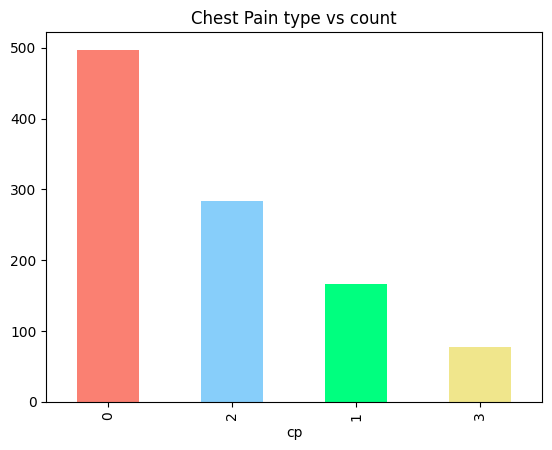

In [26]:
df.cp.value_counts().plot(kind = 'bar', color = ['salmon', 'lightskyblue','springgreen', 'khaki'])
plt.title("Chest Pain type vs count");

In [27]:
pd.crosstab(df.sex, df.cp)

cp,0,1,2,3
sex,,,,
0,133,57,109,13
1,364,110,175,64


Text(0.5, 0, ' 0 = Female, 1 = Male ')

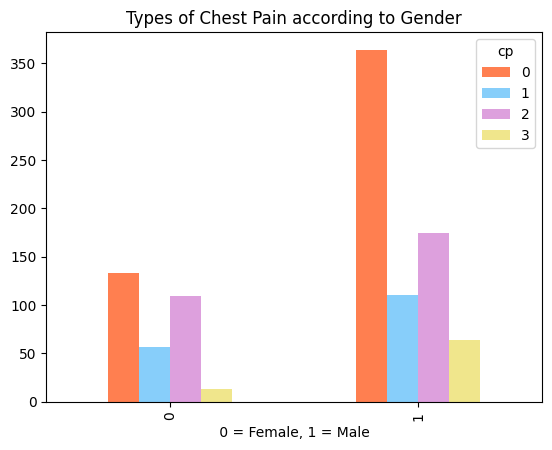

In [10]:
pd.crosstab(df.sex, df.cp).plot(kind = 'bar',color = ['coral', 'lightskyblue', 'plum', 'khaki'])
plt.title("Types of Chest Pain according to Gender")
plt.xlabel(' 0 = Female, 1 = Male ')

In [24]:
# 4. People with which chest pain are most pron to have heart disease ? 


pd.crosstab(df.cp,df.target)


target,0,1
cp,,
0,375,122
1,33,134
2,65,219
3,26,51


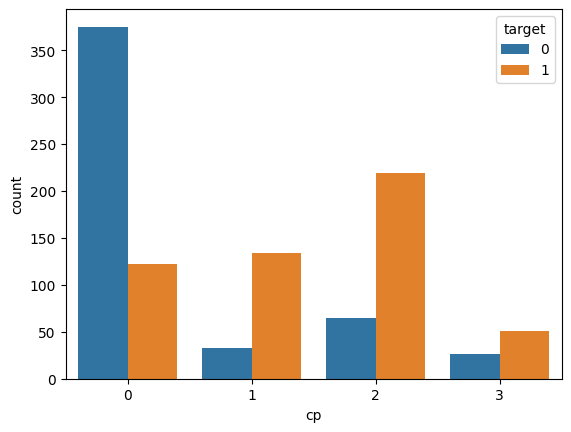

In [25]:
sns.countplot(x = 'cp', data = df, hue = 'target');

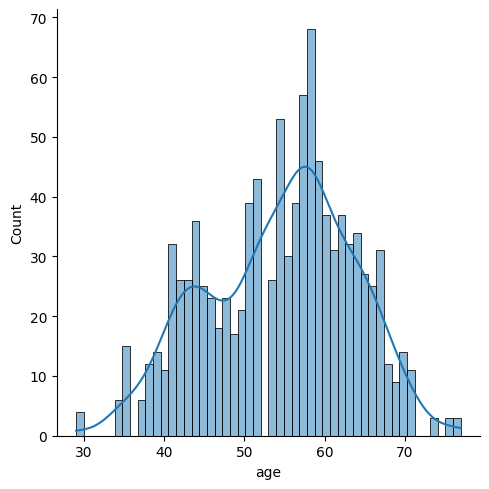

In [26]:
sns.displot( x = 'age', data = df, bins = 50, kde = True);

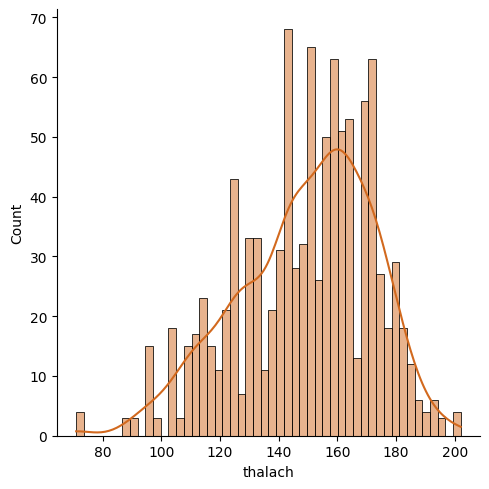

In [28]:
sns.displot( x = 'thalach', data = df, bins = 50, kde = True, color = 'chocolate');